## <font color='red'> <DIV align='center'> SINIF DENGESIZLIGI

ODEV:
Sınıf dengesizliğine sahip kalp krizi riski'ne ilişkin veri kümesini kullanarak:

Lojistik Regresyon modeli oluşturup modelinizin performansını ölçün,
Değişik yöntemler ve sınıf oranlarını deneyerek, sınıf dengesizliğinin üstesinden gelin ve performansı en yüksek yöntemi ve sınıflar arası oranı belirleyin.

##### age: The person's age in years
##### sex: The person's sex (1 = male, 0 = female)
##### cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
##### trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
##### chol: The person's cholesterol measurement in mg/dl
##### fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
##### restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
##### thalach: The person's maximum heart rate achieved
##### exang: Exercise induced angina (1 = yes; 0 = no)
##### oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
##### slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
##### ca: The number of major vessels (0-3)
##### thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
##### target: Heart disease (0 = no, 1 = yes)

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/cleveland-0_vs_4.dat', skiprows=18, delimiter=',', header=None)

In [3]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,negative
1,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,negative
2,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,negative
3,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,negative
4,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,negative


In [4]:
df.columns= ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal', 'target']


In [5]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,negative
1,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,negative
2,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,negative
3,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,negative
4,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,negative


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df[df['target']== 'positive']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,60.0,1.0,4.0,130.0,206.0,0.0,2.0,132.0,1.0,2.4,2.0,2.0,7.0,positive
165,65.0,0.0,4.0,150.0,225.0,0.0,2.0,114.0,0.0,1.0,2.0,3.0,7.0,positive
166,58.0,1.0,3.0,112.0,230.0,0.0,2.0,165.0,0.0,2.5,2.0,1.0,7.0,positive
167,50.0,1.0,4.0,150.0,243.0,0.0,2.0,128.0,0.0,2.6,2.0,0.0,7.0,positive
168,63.0,0.0,4.0,150.0,407.0,0.0,2.0,154.0,0.0,4.0,2.0,3.0,7.0,positive
169,57.0,1.0,4.0,165.0,289.0,1.0,2.0,124.0,0.0,1.0,2.0,3.0,7.0,positive
170,55.0,1.0,4.0,160.0,289.0,0.0,2.0,145.0,1.0,0.8,2.0,1.0,7.0,positive
171,77.0,1.0,4.0,125.0,304.0,0.0,2.0,162.0,1.0,0.0,1.0,3.0,3.0,positive
172,64.0,1.0,4.0,145.0,212.0,0.0,2.0,132.0,0.0,2.0,2.0,2.0,6.0,positive
173,38.0,1.0,1.0,120.0,231.0,0.0,0.0,182.0,1.0,3.8,2.0,0.0,7.0,positive


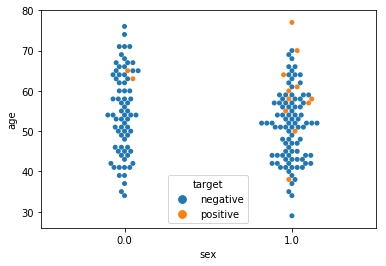

In [8]:
import seaborn as sns
ax = sns.swarmplot(x="sex", y="age", hue= "target", data=df)

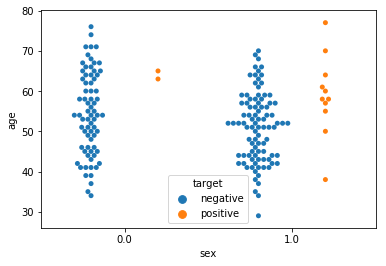

In [9]:
ax = sns.swarmplot(x="sex", y="age", hue= "target",dodge=True, data=df)

In [10]:
df['target']= df['target'].map({'negative': 0, 'positive': 1})

In [11]:
df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
172,64.0,1.0,4.0,145.0,212.0,0.0,2.0,132.0,0.0,2.0,2.0,2.0,6.0,1
173,38.0,1.0,1.0,120.0,231.0,0.0,0.0,182.0,1.0,3.8,2.0,0.0,7.0,1
174,61.0,1.0,4.0,138.0,166.0,0.0,2.0,125.0,1.0,3.6,2.0,1.0,3.0,1
175,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,1
176,70.0,1.0,4.0,145.0,174.0,0.0,0.0,125.0,1.0,2.6,3.0,0.0,7.0,1


In [12]:
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
age,1.000000,-0.149906,0.119968,0.288781,0.236702,0.127511,0.167948,-0.531418,0.085397,0.179274,0.138686,0.192482
sex,-0.149906,1.000000,-0.078854,0.033050,-0.233371,0.134962,-0.010933,0.154407,0.127632,0.098240,0.034990,0.150826
cp,0.119968,-0.078854,1.000000,-0.061225,0.089064,-0.116393,0.032421,-0.235479,0.131858,0.013466,0.033984,0.250407
trestbps,0.288781,0.033050,-0.061225,1.000000,0.105242,0.147393,0.158507,-0.055091,-0.017273,0.170804,0.049826,0.151685
chol,0.236702,-0.233371,0.089064,0.105242,1.000000,-0.011054,0.198376,0.034626,-0.043500,0.069352,-0.040784,0.051716
fbs,0.127511,0.134962,-0.116393,0.147393,-0.011054,1.000000,0.043008,-0.026620,-0.086148,-0.052191,0.000458,-0.048249
restecg,0.167948,-0.010933,0.032421,0.158507,0.198376,0.043008,1.000000,-0.125276,0.094392,0.142003,0.175066,0.205844
thalach,-0.531418,0.154407,-0.235479,-0.055091,0.034626,-0.026620,-0.125276,1.000000,-0.177621,-0.228253,-0.278286,-0.235326
exang,0.085397,0.127632,0.131858,-0.017273,-0.043500,-0.086148,0.094392,-0.177621,1.000000,0.117338,0.093256,0.226447
oldpeak,0.179274,0.098240,0.013466,0.170804,0.069352,-0.052191,0.142003,-0.228253,0.117338,1.000000,0.534802,0.487022


In [13]:
corr_list =  corr_matrix.target.abs().sort_values(ascending=False).index[1:]
corr_list

Index(['oldpeak', 'slope', 'cp', 'thalach', 'exang', 'restecg', 'age',
       'trestbps', 'sex', 'chol', 'fbs'],
      dtype='object')

Text(0.5, 1.0, 'General Looking on Life Expectancy in Years')

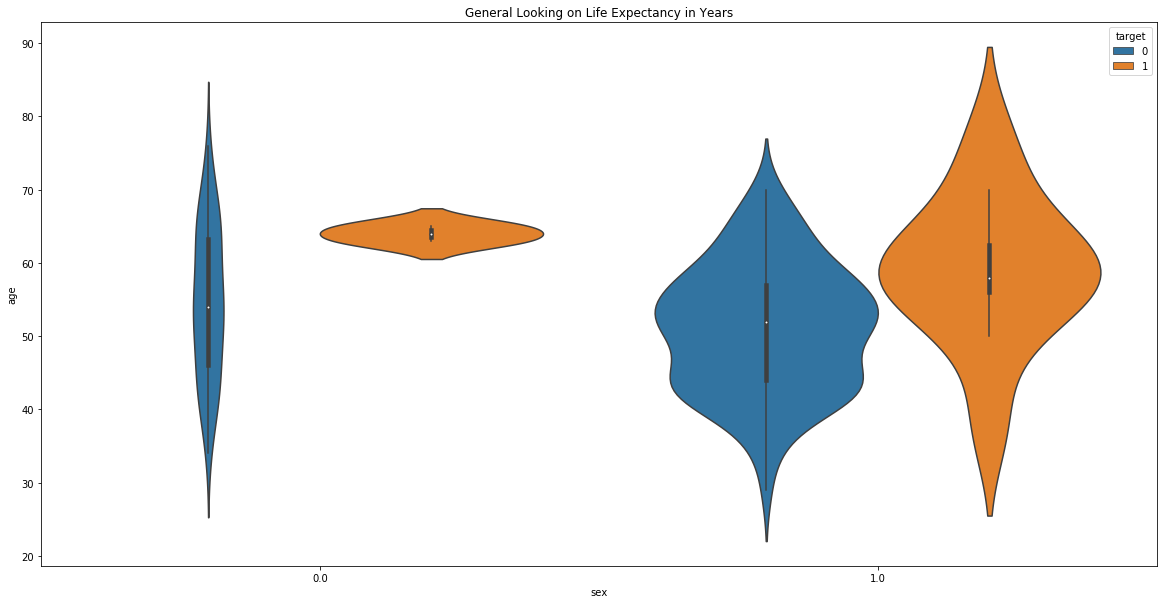

In [14]:
plt.figure(figsize=(20,10))
sns.violinplot(x=df["sex"], y=df["age"], data=df, hue=df.target)
plt.title('General Looking on Life Expectancy in Years')

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [16]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [17]:
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope']] 
y = df.target 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
egitim_dogruluk = lr.score(X_train, y_train)
test_dogruluk = lr.score(X_test, y_test)
print('One-vs-rest', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.95
Modelin test verisindeki doğruluğu   : 0.97


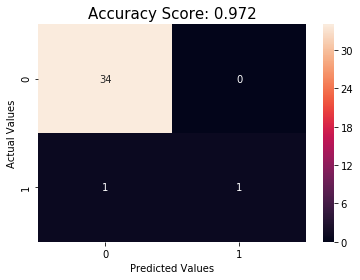

In [20]:
from sklearn.metrics import confusion_matrix 


predictions = lr.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = confusion_matrix(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [21]:
X = df[['age', 'sex','chol']] 
y = df.target 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
egitim_dogruluk = lr.score(X_train, y_train)
test_dogruluk = lr.score(X_test, y_test)
print('One-vs-rest', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.92
Modelin test verisindeki doğruluğu   : 0.94


#### 2. Değişik yöntemler ve sınıf oranlarını deneyerek, sınıf dengesizliğinin üstesinden gelin ve performansı en yüksek yöntemi ve sınıflar arası oranı belirleyin.

Modelin performans ölçüm metriğini değiştirmek.

Veri kümesini yeniden örneklemek.

Sentetik örnekler üretmek.

Değişik algoritmaları denemek.

Kalp Krizi 0   : %7.34
Kalp Krizi 1   : %92.66


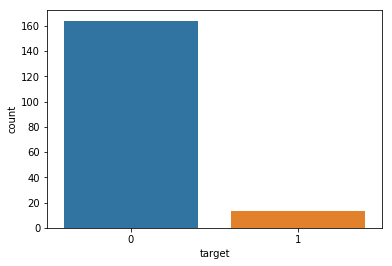

In [24]:
sns.countplot(df.target)
print("Kalp Krizi 0   : %{:.2f}".format(sum(df.target)/len(df.target)*100))
print("Kalp Krizi 1   : %{:.2f}".format((len(df.target)-sum(df.target))/len(df.target)*100))

##### Veri kumesi dengesiz

### 1. Modelin performans ölçüm metriğini değiştirmek.

In [25]:
from sklearn.metrics import classification_report

In [26]:
def model_olustur(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify = y)
    logreg_model = LogisticRegression()
    logreg_model.fit(X_train, y_train)

    tahmin_eğitim = logreg_model.predict(X_train)
    tahmin_test = logreg_model.predict(X_test)
    hata_matrisi_eğitim = confusion_matrix(y_train, tahmin_eğitim)
    hata_matrisi_test = confusion_matrix(y_test, tahmin_test)
    print("Modelin doğruluk değeri : ",  logreg_model.score(X_test, y_test))
    print("Eğitim veri kümesi")
    print(classification_report(y_train,tahmin_eğitim) )
    print("Test veri kümesi")
    print(classification_report(y_test,tahmin_test) )
    return  None

In [27]:
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope']] 
y = df['target']
model_olustur(X,y)

#precision: Hassasiyet
#recall: Duyarlilik

Modelin doğruluk değeri :  0.8611111111111112
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       131
           1       1.00      0.70      0.82        10

   micro avg       0.98      0.98      0.98       141
   macro avg       0.99      0.85      0.91       141
weighted avg       0.98      0.98      0.98       141

Test veri kümesi
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        33
           1       0.25      0.33      0.29         3

   micro avg       0.86      0.86      0.86        36
   macro avg       0.59      0.62      0.60        36
weighted avg       0.88      0.86      0.87        36



### 2.1 Veri kümesini yeniden örneklemek 

Sınıf dengesizliği durumunda daha az veriye sahip sınıfın verisini tekrar yerine koyma yöntemi ile yeniden örneklem seçerek veriyi dengeli hale getirebiliriz. Bunun için iki yöntem uygulayabiliriz.

Daha az veriye sahip sınıfa ait verilerin kopyalarak sayısını artırmak.(Örneklem Artırma)
Daha çok veriye sahip sınıfın verilerinden bazılarını silmek.(Örneklem Azaltma)

In [28]:
from sklearn.utils import resample 

Heart_disease_Yes   = df[df.target == 1]
Heart_disease_No    = df[df.target == 0]

Heart_disease_artırılmış = resample(Heart_disease_Yes,
                                     replace = True,
                                     n_samples = len(Heart_disease_No),
                                     random_state = 0)

artırılmıs_df = pd.concat([Heart_disease_No, Heart_disease_artırılmış])
artırılmıs_df.target.value_counts()

1    164
0    164
Name: target, dtype: int64

In [29]:
X = artırılmıs_df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope']]
y = artırılmıs_df['target']
model_olustur(X,y)

Modelin doğruluk değeri :  0.8636363636363636
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       131
           1       0.95      1.00      0.97       131

   micro avg       0.97      0.97      0.97       262
   macro avg       0.97      0.97      0.97       262
weighted avg       0.97      0.97      0.97       262

Test veri kümesi
              precision    recall  f1-score   support

           0       1.00      0.73      0.84        33
           1       0.79      1.00      0.88        33

   micro avg       0.86      0.86      0.86        66
   macro avg       0.89      0.86      0.86        66
weighted avg       0.89      0.86      0.86        66



In [30]:
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope']] 
y = df['target']
model_olustur(X,y)

Modelin doğruluk değeri :  0.8611111111111112
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       131
           1       1.00      0.70      0.82        10

   micro avg       0.98      0.98      0.98       141
   macro avg       0.99      0.85      0.91       141
weighted avg       0.98      0.98      0.98       141

Test veri kümesi
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        33
           1       0.25      0.33      0.29         3

   micro avg       0.86      0.86      0.86        36
   macro avg       0.59      0.62      0.60        36
weighted avg       0.88      0.86      0.87        36



### 2.2 Örneklem Azaltmak

In [31]:
Heart_disease_Yes   = df[df.target == 1]
Heart_disease_No    = df[df.target == 0]

Heart_disease_azaltilmiş = resample(Heart_disease_No,
                                     replace = True,
                                     n_samples = len(Heart_disease_Yes),
                                                     random_state = 0)

azaltılmış_df = pd.concat([Heart_disease_Yes, Heart_disease_azaltilmiş])
azaltılmış_df.target.value_counts()

1    13
0    13
Name: target, dtype: int64

In [32]:
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope']] 
y = df['target']
model_olustur(X,y)

Modelin doğruluk değeri :  0.8611111111111112
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       131
           1       1.00      0.70      0.82        10

   micro avg       0.98      0.98      0.98       141
   macro avg       0.99      0.85      0.91       141
weighted avg       0.98      0.98      0.98       141

Test veri kümesi
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        33
           1       0.25      0.33      0.29         3

   micro avg       0.86      0.86      0.86        36
   macro avg       0.59      0.62      0.60        36
weighted avg       0.88      0.86      0.87        36



### 3. Sentetik örnekler üretmek

#### <font color="red"> SMOTE (Synthetic Minority Over-sampling Technique) 
    
    #### Daha önceki örneklem artırma metodunda az olan verinin birebir kopyasını oluşturuyorduk. SMOTE ise bazı değişkenleri       değiştirerek yeni veriler üretmektedir. 
    ###  Sentetik Örneklem Üretilmesinin ana aşamaları şunlardır:

    ## Öncelikle baskın (veya çoğunluk) sınıfa ait veriler yok sayilir.
    ## Her azınlık sınıfına ait veri için, en yakın komşu sayısı belirlenir. 
    ## Veri ile komşuları arasında rastgele bir yerde yeni veriler oluşturulur. Böylece azınlık sınıfının veri sayısını artırmış olur.

In [33]:
from unbalanced import SMOTE

ModuleNotFoundError: No module named 'unbalanced'

In [ ]:
from imblearn import under_sampling, over_sampling

In [ ]:
from imblearn.datasets import SMOTE

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
y = df.target
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope']] 

sm = SMOTE(random_state=0, ratio=1.0)
X_smote, y_smote = sm.fit_sample(X, y)

In [ ]:
model_olustur(X_smote, y_smote)

#### <font color="red"> ADASYN (Adaptive Syntetic Sampling)'
    
    ### SMOTE ile sentetik örnek, veri ile en yakın komşusu arasındaki doğru üzerinde oluşturulurken, ADASYN ile üretilen örnekler bu doğrunun çok yakınında üretilmekte ve böylece daha gerçekçi olması sağlanmaktadır.

In [ ]:
from imblearn.over_sampling import ADASYN

In [ ]:
y = df.target
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope']] 

ad = ADASYN()
X_adasyn, y_adasyn = ad.fit_sample(X, y)


In [ ]:
model_olustur(X_adasyn, y_adasyn)